In [1]:
import networkx as nx

# Construction de graphes

## Comment créer un graphe vide

In [2]:
gr = nx.Graph()

**ATTENTION** on a ici créer un graphe non orienté on utilisera `nx.DiGraph` pour avoir un graphe orienté avec des variantes pour les opérations ci-dessous.

## Comment ajouter un noeud

In [3]:
gr.add_node("A")

**ATTENTION** : les objets utilisés pour créer les noeuds doivent être `hashable` donc moralement immutable.

## Comment ajouter plusieurs noeuds simultanément 

En passant un conteneur d'objets.

In [4]:
gr.add_nodes_from("BCDE")
gr.add_nodes_from(["F", "G", "H"])

## Comment enlever un/des noeud

In [5]:
gr.remove_node("H")
gr.remove_nodes_from("EFH")

## Comment ajouter une arrête

In [6]:
gr.add_edge("A", "B")

**ATTENTION** les noeuds passés pour définir une arrête seront rajoutés s'il ne sont pas déjà présent dans la liste de noeuds.

In [7]:
gr.add_edge("U", "V")

## Comment ajouter plusieurs arrêtes simultanément

In [8]:
gr.add_edges_from([("A", "C"), ("A", "D"), ("B", "C"), ("A", "B")])

## Comment enlever une/des arrêtes

In [9]:
gr.remove_edge("U", "V")
gr.remove_edges_from((("A", "C"), ("A", "D")))

## Comment ajouter des propriétés aux noeuds

In [10]:
gr.nodes["A"]["depart"] = True

## Comment ajouter des propriétés aux arrêtes

In [11]:
gr.edges["A", "B"]["poids"] = 1

## Comment ajouter des arrêtes avec propriétés simplement

In [12]:
gr.add_weighted_edges_from([("A", "U", 2), ("A", "V", 3), ("C", "U", 1), ("D", "V", 5)], weight="poids")

# Analyse de graphes

## Comment voire le nombre de noeuds/sommets

In [13]:
print(gr.number_of_edges())
print(gr.number_of_nodes())

6
7


## Comment voire les noeuds

In [14]:
gr.nodes

NodeView(('A', 'B', 'C', 'D', 'G', 'U', 'V'))

## Comment voire les arrêtes

In [15]:
gr.edges

EdgeView([('A', 'B'), ('A', 'U'), ('A', 'V'), ('B', 'C'), ('C', 'U'), ('D', 'V')])

## Comment voire les degrés des noeuds 

In [16]:
gr.degree

DegreeView({'A': 3, 'B': 2, 'C': 2, 'D': 1, 'G': 0, 'U': 2, 'V': 2})

## Comment voire les voisinages

In [17]:
gr.adj

AdjacencyView({'A': {'B': {'poids': 1}, 'U': {'poids': 2}, 'V': {'poids': 3}}, 'B': {'A': {'poids': 1}, 'C': {}}, 'C': {'B': {}, 'U': {'poids': 1}}, 'D': {'V': {'poids': 5}}, 'G': {}, 'U': {'A': {'poids': 2}, 'C': {'poids': 1}}, 'V': {'A': {'poids': 3}, 'D': {'poids': 5}}})

## Comment accéder aux voisins d'un noeud

In [18]:
gr["A"]

AtlasView({'B': {'poids': 1}, 'U': {'poids': 2}, 'V': {'poids': 3}})

# Visualisation de graphes

## Comment visualiser un graphe

Il faut d'abord importer pyplot et modifier les options si on le veut

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.rcParams["figure.figsize"] = (12, 8)

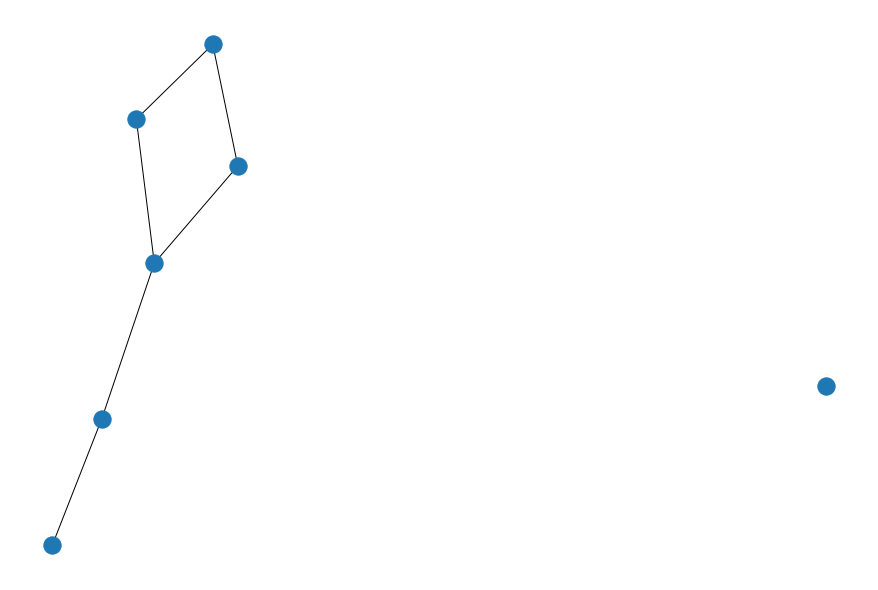

In [21]:
nx.draw(gr)

## Comment visualiser avec les noms des sommets

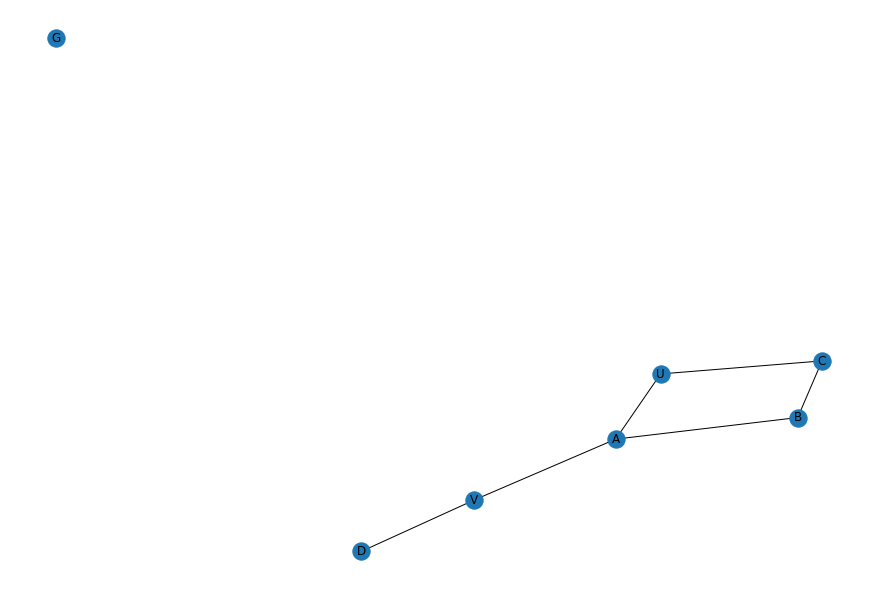

In [22]:
nx.draw(gr, with_labels=True)

# Comment afficher un graphe dans une figure/repère spécifique
pour par exemple sauver la figure dans un fichier avec la méthode `savefig`.

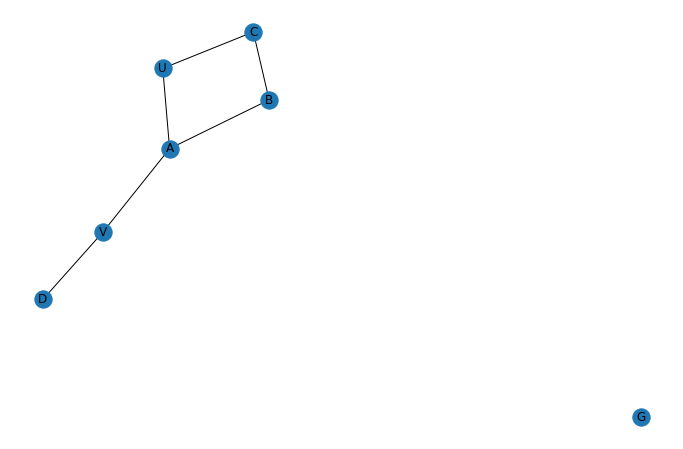

In [23]:
fig, rep = plt.subplots()
nx.draw(gr, ax=rep, with_labels=True)

## Comment récupérer les positions des sommets

In [24]:
positions = nx.spring_layout(gr)
positions

{'A': array([ 0.16050873, -0.10170516]),
 'B': array([0.36796949, 0.04149629]),
 'C': array([ 0.55883427, -0.05559875]),
 'D': array([-0.35548288, -0.22010817]),
 'G': array([-1.        ,  0.68307389]),
 'U': array([ 0.3937424 , -0.19232667]),
 'V': array([-0.12557201, -0.15483143])}

## Comment afficher aussi les propriétés des arrêtes

{('A', 'B'): Text(0.2642391108286908, -0.03010443484060266, '1'),
 ('A', 'U'): Text(0.2771255645325266, -0.14701591654513707, '2'),
 ('A', 'V'): Text(0.017468357312475202, -0.12826829516062652, '3'),
 ('C', 'U'): Text(0.4762883376163539, -0.12396271185838145, '1'),
 ('D', 'V'): Text(-0.24052744844504437, -0.1874697964382266, '5')}

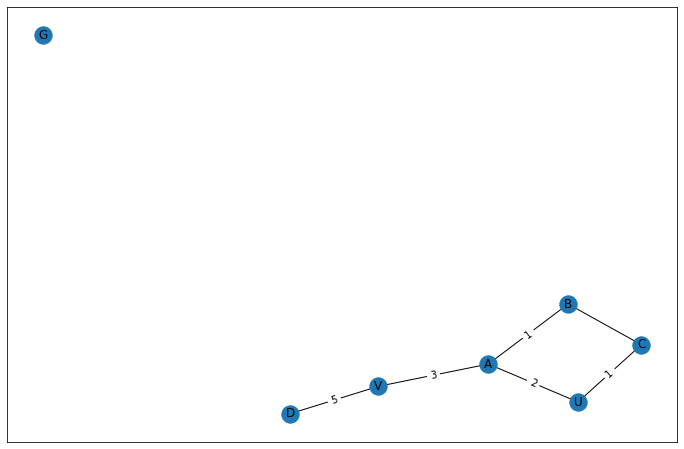

In [25]:
nx.draw_networkx(gr, positions)
poids = nx.get_edge_attributes(gr, "poids")
nx.draw_networkx_edge_labels(gr, positions, edge_labels=poids)

# Algorithmes de graphes

De nombreux autres algorithmes sont [disponibles](https://networkx.github.io/documentation/stable/reference/algorithms/index.html) en plus de ceux couverts en dessous.

## Comment trouver si le graphe est connexe (i.e. tous les couples de sommets sont reliés par au moins un chemin)

In [26]:
nx.is_connected(gr)

False

## Comment récupérer les composantes connexes

In [27]:
list(nx.connected_components(gr))

[{'A', 'B', 'C', 'D', 'U', 'V'}, {'G'}]

## Comment trouver le chemin le plus court (suivant un attribut)

In [28]:
print("chemin le plus court de V à C: ", nx.dijkstra_path(gr, "V", "C", weight="poids"))
print("et sa longueur : ", nx.dijkstra_path_length(gr, "V", "C", weight="poids"))

chemin le plus court de V à C:  ['V', 'A', 'B', 'C']
et sa longueur :  5


**ATTENTION** on à utiliser ici l'algorithme de Dijkstra mais d'autres algorithmes et d'autres fonctions sont [disponibles](https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html).

## Comment trouver le flot maximal d'un graphe

In [29]:
nx.flow.maximum_flow(gr, "C", "D", capacity="poids")

(2,
 {'A': {'B': 0, 'U': 0, 'V': 2},
  'B': {'A': 1, 'C': 0},
  'C': {'B': 1, 'U': 1},
  'D': {'V': 0},
  'G': {},
  'U': {'A': 1, 'C': 0},
  'V': {'A': 0, 'D': 2}})